Fitting Dark Matter into the Standard Model, Sexy no?....

In [ ]:
# Step 1: Importing required libraries for symbolic mathematics
import sympy as sp

# Step 2: Define the SU(3) group parameters and fields

# Gluon fields A_mu^a (a = 1 to 8 for SU(3))
a, b, c = sp.symbols('a b c')  # SU(3) indices
mu, nu = sp.symbols('mu nu')  # Spacetime indices
g = sp.symbols('g')  # QCD coupling constant

# Defining the gluon field A_mu^a
A_mu_a = sp.Function('A_mu_a')(mu, a)

# Step 3: Define the field strength tensor G_mu_nu^a
# G_mu_nu^a = d_mu A_nu^a - d_nu A_mu^a + g f^abc A_mu^b A_nu^c

# Derivatives of the gluon field (partial derivatives)
d_mu_A_nu_a = sp.Derivative(A_mu_a, mu)
d_nu_A_mu_a = sp.Derivative(A_mu_a, nu)

# SU(3) structure constants f^{abc} (we'll leave them symbolic for now)
f_abc = sp.Function('f')(a, b, c)

# Field strength tensor G_mu_nu^a
G_mu_nu_a = d_mu_A_nu_a - d_nu_A_mu_a + g * f_abc * A_mu_a * A_mu_a

# Display the field strength tensor
sp.pprint(G_mu_nu_a)

       2                    ∂                 ∂              
g⋅Aₘᵤ ₐ (μ, a)⋅f(a, b, c) + ──(Aₘᵤ ₐ(μ, a)) - ──(Aₘᵤ ₐ(μ, a))
                            ∂μ                ∂ν             


In [ ]:
# Step 2: Expand and simplify the field strength tensor

# Expanding the field strength tensor G_mu_nu_a (redefining in more explicit terms)
# We use dummy indices for the gluon field interactions, e.g., A_mu^b, A_nu^c
b, c = sp.symbols('b c')

# Define gluon fields for different SU(3) components A_mu^b and A_nu^c
A_mu_b = sp.Function('A_mu_b')(mu, b)
A_nu_c = sp.Function('A_nu_c')(nu, c)

# Expand G_mu_nu^a explicitly
G_mu_nu_a_expanded = d_mu_A_nu_a - d_nu_A_mu_a + g * f_abc * A_mu_b * A_nu_c

# Simplify the expression symbolically
G_mu_nu_a_simplified = sp.simplify(G_mu_nu_a_expanded)

# Display the simplified version of the field strength tensor
sp.pprint(G_mu_nu_a_simplified)



                                       ∂              
g⋅A_μ_b(μ, b)⋅A_ν_c(ν, c)⋅f(a, b, c) + ──(Aₘᵤ ₐ(μ, a))
                                       ∂μ             


In [ ]:
# Step 3: Define the quark fields and covariant derivative

# Define quark fields (psi) for different flavors f
f = sp.symbols('f')  # Flavor index for quarks
psi_f = sp.Function('psi_f')(f)  # Quark field

# Define the SU(3) generator T^a (we'll keep it symbolic for now)
T_a = sp.Symbol('T_a')  # SU(3) generator in the fundamental representation

# Define the covariant derivative D_mu for quark-gluon interaction
D_mu_psi_f = sp.Derivative(psi_f, mu) - sp.I * g * T_a * A_mu_a * psi_f

# Display the covariant derivative
sp.pprint(D_mu_psi_f)


                             d         
-ⅈ⋅Tₐ⋅g⋅Aₘᵤ ₐ(μ, a)⋅ψ_f(f) + ──(ψ_f(f))
                             dμ        


In [ ]:
# Step 4: Constructing the QCD Lagrangian

# Define the metric tensor g^mu_nu (we'll assume a simple Minkowski metric)
g_mu_nu = sp.Matrix([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])

# Gluon field strength tensor term: -1/4 G^mu_nu^a G_mu_nu^a
L_gluon = -1/4 * (G_mu_nu_a * G_mu_nu_a)

# Quark field term: sum_f (i gamma^mu D_mu - m_f) psi_f
# gamma matrices for Dirac equation
gamma_mu = sp.Symbol('gamma_mu')

# Mass term for the quarks
m_f = sp.Symbol('m_f')  # Mass of quark of flavor f

# Quark field term with covariant derivative
L_quark = sp.I * gamma_mu * D_mu_psi_f - m_f * psi_f

# Full QCD Lagrangian
L_QCD = L_gluon + L_quark

# Display the QCD Lagrangian
sp.pprint(L_QCD)


                                                                                                   ↪
      ⎛                             d         ⎞                     ⎛       2                    ∂ ↪
ⅈ⋅γₘᵤ⋅⎜-ⅈ⋅Tₐ⋅g⋅Aₘᵤ ₐ(μ, a)⋅ψ_f(f) + ──(ψ_f(f))⎟ - m_f⋅ψ_f(f) - 0.25⋅⎜g⋅Aₘᵤ ₐ (μ, a)⋅f(a, b, c) + ─ ↪
      ⎝                             dμ        ⎠                     ⎝                            ∂ ↪

↪                                  2
↪                  ∂              ⎞ 
↪ ─(Aₘᵤ ₐ(μ, a)) - ──(Aₘᵤ ₐ(μ, a))⎟ 
↪ μ                ∂ν             ⎠ 


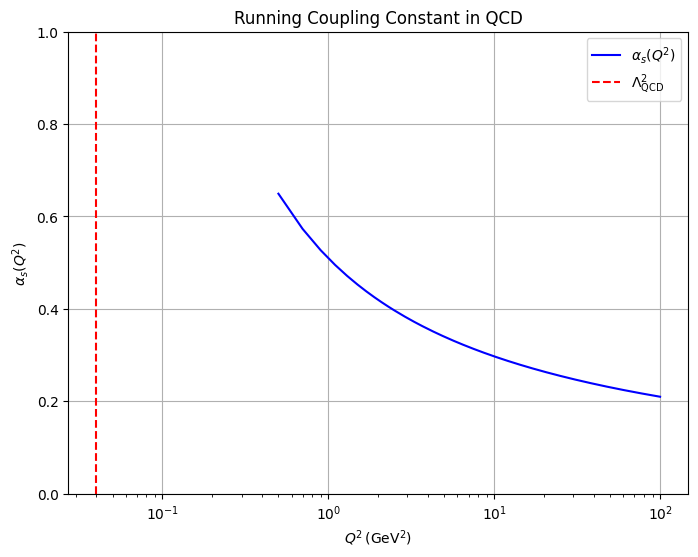

In [ ]:
# Step 5: Running coupling constant alpha_s(Q^2)

import numpy as np
import matplotlib.pyplot as plt

# Define constants
n_f = 5  # Number of active quark flavors (usually 5 for typical energy ranges)
Lambda_QCD = 0.2  # QCD scale parameter in GeV
beta_0 = (33 - 2 * n_f) / (12 * np.pi)

# Define the running coupling constant function
def alpha_s(Q2, Lambda_QCD, beta_0):
    return 1 / (beta_0 * np.log(Q2 / Lambda_QCD**2))

# Generate a range of energy scales (in GeV^2)
Q2_values = np.linspace(0.5, 100, 500)

# Calculate alpha_s for the energy range
alpha_s_values = alpha_s(Q2_values, Lambda_QCD, beta_0)

# Plot the running coupling constant
plt.figure(figsize=(8, 6))
plt.plot(Q2_values, alpha_s_values, label=r'$\alpha_s(Q^2)$', color='b')
plt.axvline(Lambda_QCD**2, color='r', linestyle='--', label=r'$\Lambda_{\mathrm{QCD}}^2$')
plt.title('Running Coupling Constant in QCD')
plt.xlabel(r'$Q^2 \, (\mathrm{GeV}^2)$')  # Fix the LaTeX formatting issue
plt.ylabel(r'$\alpha_s(Q^2)$')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for energy
plt.ylim(0, 1)
plt.show()


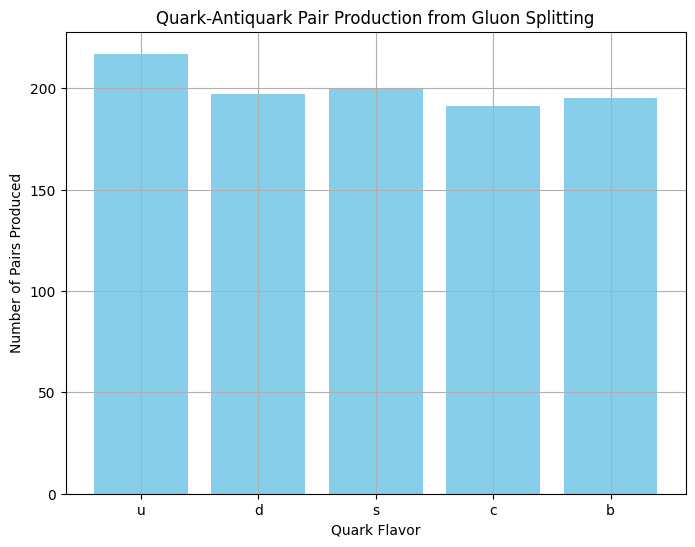

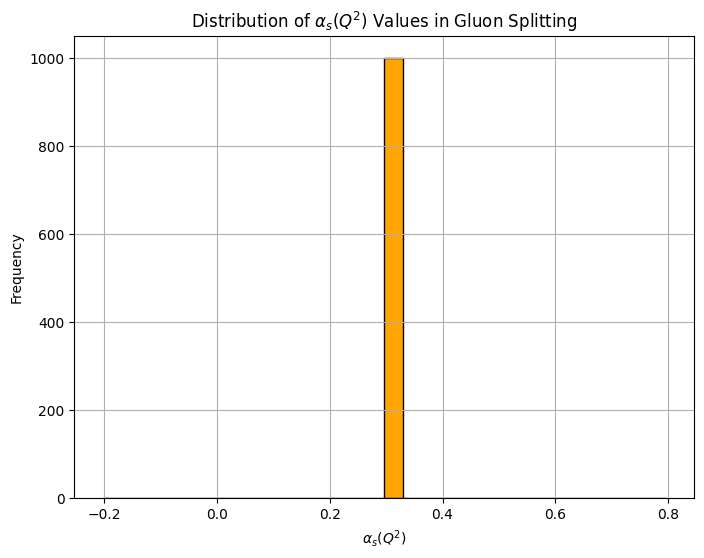

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
num_events = 1000  # Number of gluon splitting events
Q2_initial = 10.0  # Initial energy scale in GeV^2
quark_flavors = ['u', 'd', 's', 'c', 'b']  # Quark flavors (ignore t-quark for this energy scale)

# Running coupling constant as a function of Q^2
def alpha_s(Q2, Lambda_QCD, beta_0):
    return 1 / (beta_0 * np.log(Q2 / Lambda_QCD**2))

# Simulate gluon splitting
def simulate_gluon_splitting(num_events, Q2_initial, Lambda_QCD, beta_0, quark_flavors):
    results = []
    for _ in range(num_events):
        Q2 = Q2_initial
        alpha_s_value = alpha_s(Q2, Lambda_QCD, beta_0)  # Running coupling for gluon splitting
        prob = np.random.random()  # Random probability for flavor selection

        # Determine which quark-antiquark pair is produced based on random probability
        if prob < 0.2:
            quark_pair = ('u', 'anti-u')
        elif prob < 0.4:
            quark_pair = ('d', 'anti-d')
        elif prob < 0.6:
            quark_pair = ('s', 'anti-s')
        elif prob < 0.8:
            quark_pair = ('c', 'anti-c')
        else:
            quark_pair = ('b', 'anti-b')

        results.append((quark_pair, alpha_s_value))

    return results

# Parameters for QCD
Lambda_QCD = 0.2  # QCD scale parameter in GeV
beta_0 = (33 - 2 * len(quark_flavors)) / (12 * np.pi)

# Simulate gluon splitting events
events = simulate_gluon_splitting(num_events, Q2_initial, Lambda_QCD, beta_0, quark_flavors)

# Analyze and plot results
quark_pairs = [event[0] for event in events]
alpha_s_values = [event[1] for event in events]

# Plot histogram of quark-antiquark pair production
flavor_counts = {flavor: quark_pairs.count((flavor, f'anti-{flavor}')) for flavor in quark_flavors}

plt.figure(figsize=(8, 6))
plt.bar(flavor_counts.keys(), flavor_counts.values(), color='skyblue')
plt.title('Quark-Antiquark Pair Production from Gluon Splitting')
plt.xlabel('Quark Flavor')
plt.ylabel('Number of Pairs Produced')
plt.grid(True)
plt.show()

# Plot histogram of alpha_s values during the events
plt.figure(figsize=(8, 6))
plt.hist(alpha_s_values, bins=30, color='orange', edgecolor='black')
plt.title(r'Distribution of $\alpha_s(Q^2)$ Values in Gluon Splitting')
plt.xlabel(r'$\alpha_s(Q^2)$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


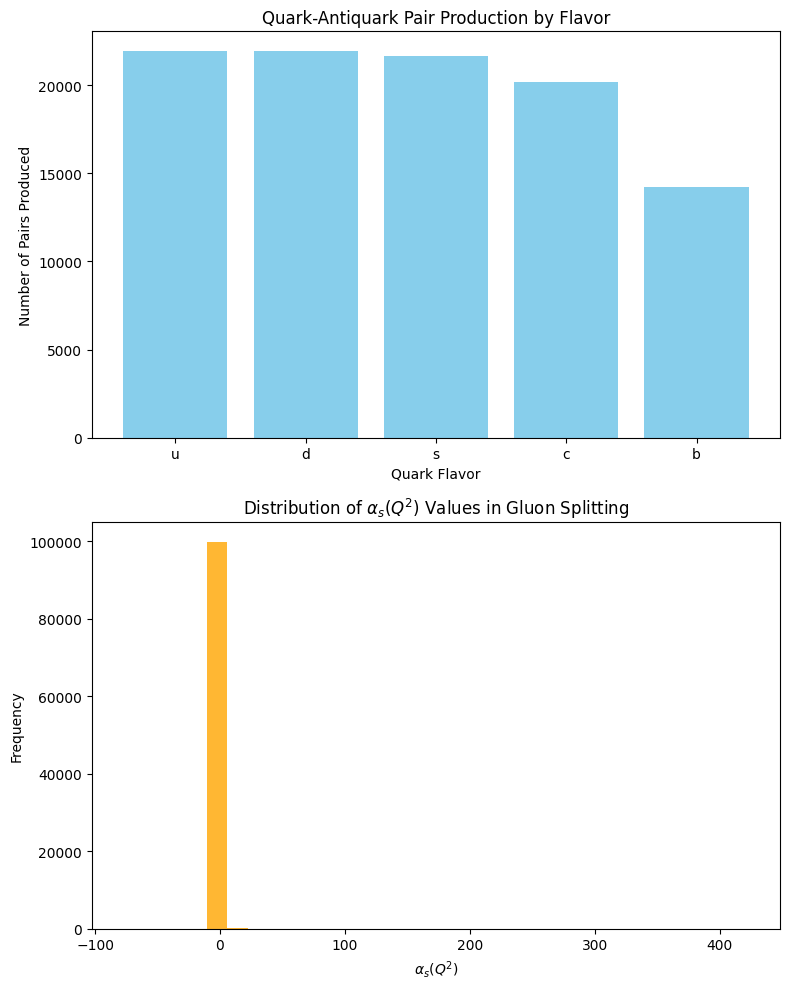

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N_events = 100000
Lambda_QCD = 0.5  # QCD scale in GeV
quark_masses = {'u': 0.002, 'd': 0.005, 's': 0.1, 'c': 1.3, 'b': 4.2}  # Quark masses in GeV
flavors = list(quark_masses.keys())

# Running coupling constant alpha_s(Q^2)
def alpha_s(Q2, Lambda_QCD):
    return 12 * np.pi / (33 - 2 * 5) / np.log(Q2 / Lambda_QCD**2)

# Dynamically sample Q^2 for each event, following some realistic distribution
Q2_values = np.random.uniform(0.1, 100, N_events)  # Q^2 from 0.1 GeV^2 to 100 GeV^2
alpha_s_values = [alpha_s(Q2, Lambda_QCD) for Q2 in Q2_values]

# Probability of producing each quark flavor is inversely proportional to mass and depends on Q^2
def quark_flavor_prob(Q2, quark_masses):
    flavor_probs = {flavor: 1 / (1 + (mass**2 / Q2)) for flavor, mass in quark_masses.items()}
    total_prob = sum(flavor_probs.values())
    return {flavor: prob / total_prob for flavor, prob in flavor_probs.items()}

# Simulate events
quark_counts = {flavor: 0 for flavor in flavors}
for Q2 in Q2_values:
    flavor_probs = quark_flavor_prob(Q2, quark_masses)
    chosen_flavor = np.random.choice(flavors, p=list(flavor_probs.values()))
    quark_counts[chosen_flavor] += 1

# Plotting results
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the distribution of quark-antiquark pairs
axs[0].bar(quark_counts.keys(), quark_counts.values(), color='skyblue')
axs[0].set_xlabel('Quark Flavor')
axs[0].set_ylabel('Number of Pairs Produced')
axs[0].set_title('Quark-Antiquark Pair Production by Flavor')

# Plot the distribution of alpha_s(Q^2)
axs[1].hist(alpha_s_values, bins=30, color='orange', alpha=0.8)
axs[1].set_xlabel(r'$\alpha_s(Q^2)$')
axs[1].set_ylabel('Frequency')
axs[1].set_title(r'Distribution of $\alpha_s(Q^2)$ Values in Gluon Splitting')

plt.tight_layout()
plt.show()


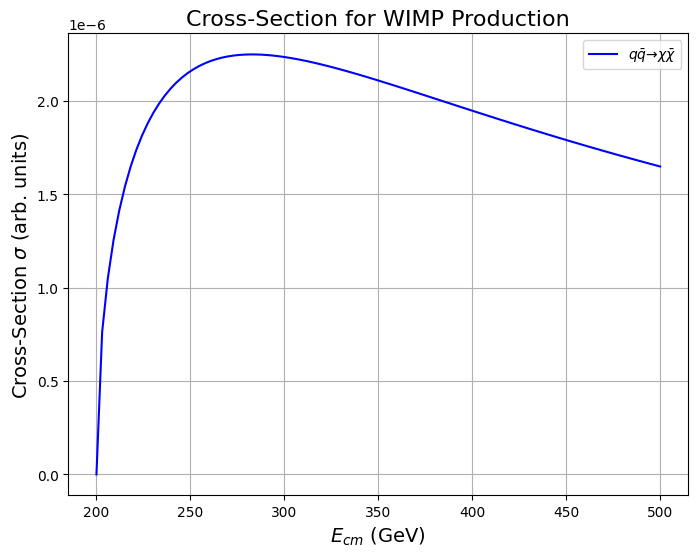

In [ ]:
## WIMP Model for Dark Matter Analysis

import numpy as np
import matplotlib.pyplot as plt

# Constants
mass_chi = 100  # GeV, mass of WIMP
mass_q = 5  # GeV, approximate quark mass
E_cm = 200  # GeV, center-of-mass energy for q qbar annihilation
alpha_weak = 0.03  # Weak coupling constant

# Cross-section for q + qbar -> chi + chibar
def sigma_qq_to_chichi(E_cm, alpha_weak, mass_chi):
    if E_cm < 2 * mass_chi:
        return 0  # No production if energy is too low
    return alpha_weak**2 / E_cm * np.sqrt(1 - (2 * mass_chi / E_cm)**2)

# Generate a range of energies and calculate cross-sections
E_cm_range = np.linspace(2 * mass_chi, 500, 100)  # Energy range for q + qbar
sigma_values = [sigma_qq_to_chichi(E, alpha_weak, mass_chi) for E in E_cm_range]

# Plot the cross-section
plt.figure(figsize=(8, 6))
plt.plot(E_cm_range, sigma_values, label=r"$q \bar{q} \to \chi \bar{\chi}$", color='b')
plt.xlabel(r"$E_{cm}$ (GeV)", fontsize=14)
plt.ylabel(r"Cross-Section $\sigma$ (arb. units)", fontsize=14)
plt.title("Cross-Section for WIMP Production", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


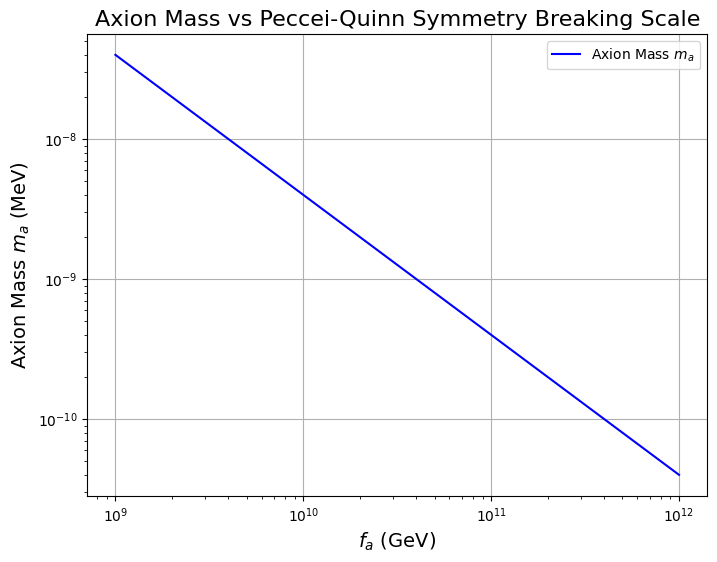

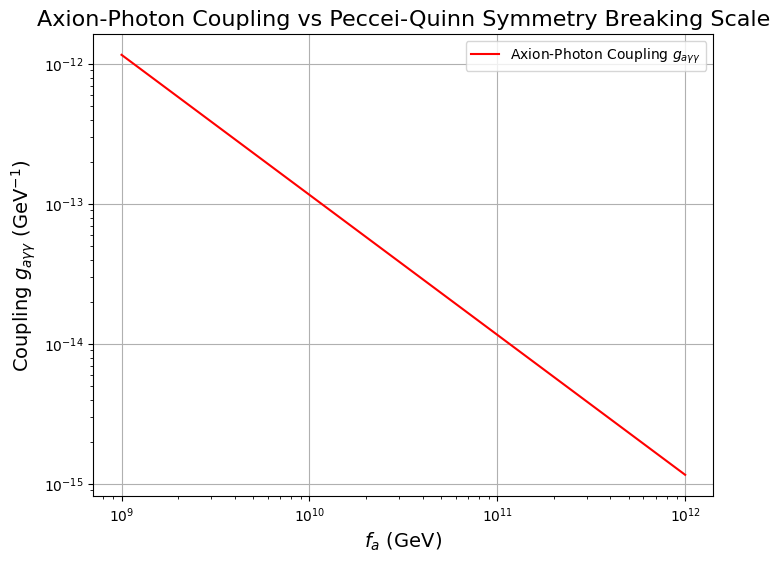

In [ ]:
## Axion Physics on Dark Matter

# Constants
Lambda_QCD = 200  # MeV, QCD scale
alpha_EM = 1 / 137  # Fine-structure constant
pi = np.pi

# Axion mass as a function of the Peccei-Quinn symmetry breaking scale (f_a)
def axion_mass(f_a):
    return Lambda_QCD**2 / f_a  # in units of MeV

# Axion-photon coupling as a function of the symmetry breaking scale (f_a)
def axion_photon_coupling(f_a):
    return alpha_EM / (2 * pi * f_a)

# Peccei-Quinn symmetry breaking scale range (in GeV)
f_a_range = np.linspace(1e9, 1e12, 100)  # Range for f_a in GeV

# Calculate axion mass and coupling
mass_values = [axion_mass(f_a * 1e3) for f_a in f_a_range]  # Convert GeV to MeV for f_a
coupling_values = [axion_photon_coupling(f_a) for f_a in f_a_range]

# Plot Axion mass vs f_a
plt.figure(figsize=(8, 6))
plt.plot(f_a_range, mass_values, label=r"Axion Mass $m_a$", color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$f_a$ (GeV)", fontsize=14)
plt.ylabel(r"Axion Mass $m_a$ (MeV)", fontsize=14)
plt.title("Axion Mass vs Peccei-Quinn Symmetry Breaking Scale", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Plot Axion-Photon Coupling vs f_a
plt.figure(figsize=(8, 6))
plt.plot(f_a_range, coupling_values, label=r"Axion-Photon Coupling $g_{a\gamma\gamma}$", color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$f_a$ (GeV)", fontsize=14)
plt.ylabel(r"Coupling $g_{a\gamma\gamma}$ (GeV$^{-1}$)", fontsize=14)
plt.title("Axion-Photon Coupling vs Peccei-Quinn Symmetry Breaking Scale", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

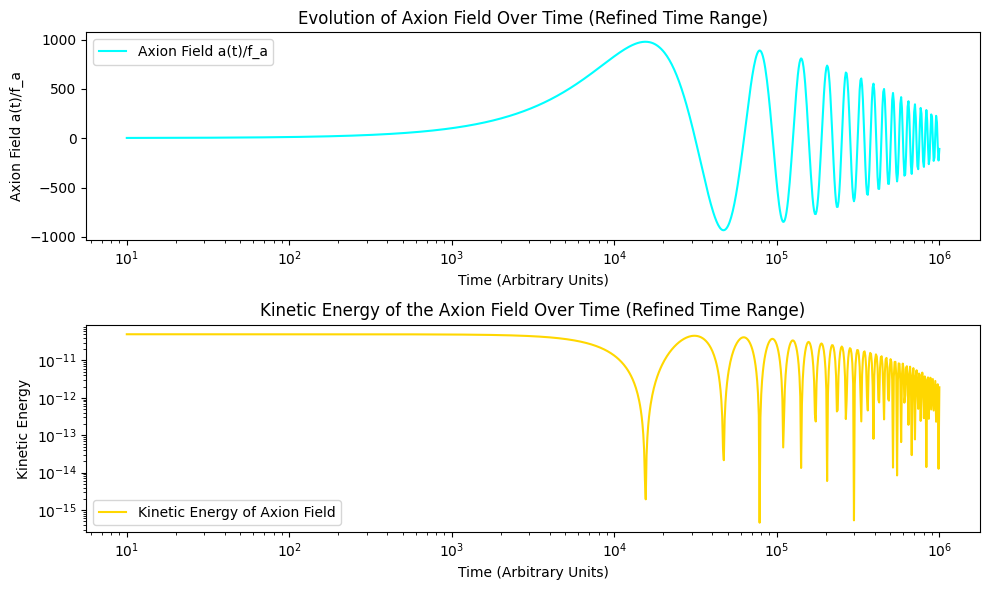

In [ ]:
## Hidden Dark Sector
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
H = 1e-6   # Smaller Hubble constant for more realistic expansion
m_a = 1e-4 # Axion mass for faster oscillations
f_a = 1e12 # Axion decay constant
a_0 = 3.0  # Initial axion field (dimensionless a/f_a)
a_dot_0 = 0.1  # Small initial velocity of axion field

# Time array: refine the time scale (avoid extreme ranges for better accuracy)
time_start = 1e1
time_end = 1e6
time = np.logspace(np.log10(time_start), np.log10(time_end), 1000)

# Define the system of differential equations
def axion_evolution(t, y, H, m_a):
    a, a_dot = y
    dydt = [a_dot, -3*H*a_dot - m_a**2*a]  # Damped harmonic oscillator equation
    return dydt

# Initial conditions [a(0), da/dt(0)]
initial_conditions = [a_0, a_dot_0]

# Solve the differential equation with a more accurate method
sol = solve_ivp(axion_evolution, [time_start, time_end], initial_conditions, args=(H, m_a), t_eval=time, method='RK45')

# Extract the axion field and its time derivative
a_vals = sol.y[0]
a_dot_vals = sol.y[1]

# Compute the kinetic energy of the axion field
def kinetic_energy(a_dot, m_a):
    return 0.5 * m_a**2 * a_dot**2

KE_vals = kinetic_energy(a_dot_vals, m_a)

# Plot the evolution of the axion field
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, a_vals, label='Axion Field a(t)/f_a', color='cyan')
plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('Axion Field a(t)/f_a')
plt.title('Evolution of Axion Field Over Time (Refined Time Range)')
plt.xscale('log')
plt.legend()

# Plot the kinetic energy over time
plt.subplot(2, 1, 2)
plt.plot(time, KE_vals, label='Kinetic Energy of Axion Field', color='gold')
plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('Kinetic Energy')
plt.xscale('log')  # Log scale for time
plt.yscale('log')  # Logarithmic scale for better visualization
plt.title('Kinetic Energy of the Axion Field Over Time (Refined Time Range)')
plt.legend()

plt.tight_layout()
plt.show()


Light Neutrino Mass (Active): -1.00000761449337e-07 eV
Heavy Neutrino Mass (Sterile): 100000.0000001 eV


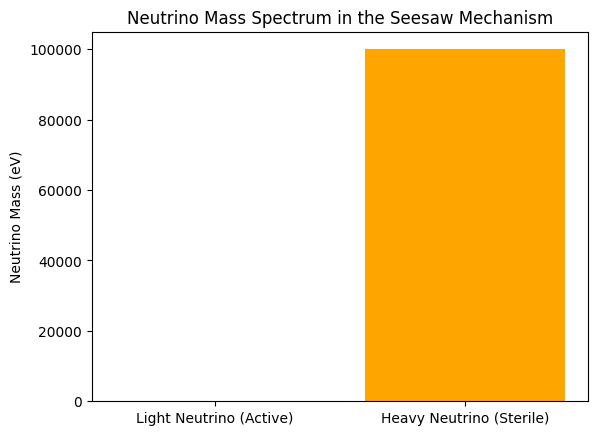

In [ ]:
## Sterile Neutrinos

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the seesaw mechanism
m_D = 0.1  # Dirac mass term (in eV)
M_R = 1e5  # Majorana mass term (in eV) for the sterile neutrino

# Neutrino mass matrix for seesaw mechanism
M_nu = np.array([[0, m_D], [m_D, M_R]])

# Diagonalizing the mass matrix to get the eigenvalues (masses)
eigenvalues, eigenvectors = np.linalg.eig(M_nu)

# Sorting the eigenvalues to identify light and heavy neutrino masses
light_mass = np.min(eigenvalues)
heavy_mass = np.max(eigenvalues)

print(f"Light Neutrino Mass (Active): {light_mass} eV")
print(f"Heavy Neutrino Mass (Sterile): {heavy_mass} eV")

# Visualize the mass spectrum
masses = [light_mass, heavy_mass]
labels = ["Light Neutrino (Active)", "Heavy Neutrino (Sterile)"]

plt.bar(labels, masses, color=['cyan', 'orange'])
plt.ylabel("Neutrino Mass (eV)")
plt.title("Neutrino Mass Spectrum in the Seesaw Mechanism")
plt.show()


Light Neutrino Masses (Active): [2.33499869e-07 7.91028866e-07 7.28654653e-06] eV
Heavy Neutrino Masses (Sterile): [  35038.7916715   220684.69863221 1811443.43964152] eV


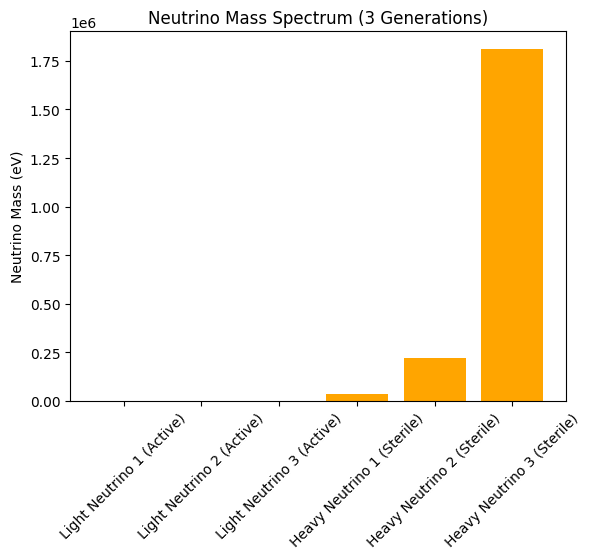

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the seesaw mechanism (3 generations)
# Random Dirac mass matrix (in eV)
m_D = np.random.uniform(0.1, 1.0, (3, 3))  # Typically small values

# Random Majorana mass matrix (in eV) - large compared to m_D
M_R = np.random.uniform(1e4, 1e6, (3, 3))

# Making M_R symmetric to represent a Majorana mass matrix
M_R = 0.5 * (M_R + M_R.T)

# Neutrino mass matrix (6x6) for seesaw mechanism
M_nu = np.block([
    [np.zeros((3, 3)), m_D],
    [m_D.T, M_R]
])

# Diagonalizing the mass matrix to get the eigenvalues (masses)
eigenvalues, eigenvectors = np.linalg.eig(M_nu)

# Sorting the eigenvalues to identify light and heavy neutrino masses
sorted_masses = np.sort(np.abs(eigenvalues))  # Taking absolute values and sorting

# Extracting light and heavy masses
light_masses = sorted_masses[:3]  # The smallest three eigenvalues
heavy_masses = sorted_masses[3:]  # The largest three eigenvalues

print("Light Neutrino Masses (Active):", light_masses, "eV")
print("Heavy Neutrino Masses (Sterile):", heavy_masses, "eV")

# Visualizing the mass spectrum
masses = np.concatenate([light_masses, heavy_masses])
labels = ["Light Neutrino 1 (Active)", "Light Neutrino 2 (Active)",
          "Light Neutrino 3 (Active)", "Heavy Neutrino 1 (Sterile)",
          "Heavy Neutrino 2 (Sterile)", "Heavy Neutrino 3 (Sterile)"]

plt.bar(labels, masses, color=['cyan']*3 + ['orange']*3)
plt.ylabel("Neutrino Mass (eV)")
plt.title("Neutrino Mass Spectrum (3 Generations)")
plt.xticks(rotation=45)
plt.show()


PMNS Matrix:
 [[ 0.82514619+0.j          0.54491056+0.j         -0.14393996+0.0385686j ]
 [-0.26915155+0.02436319j  0.60530043+0.01608898j  0.74854286+0.j        ]
 [ 0.49563636+0.02102974j -0.57985528+0.01388763j  0.64612486+0.j        ]]


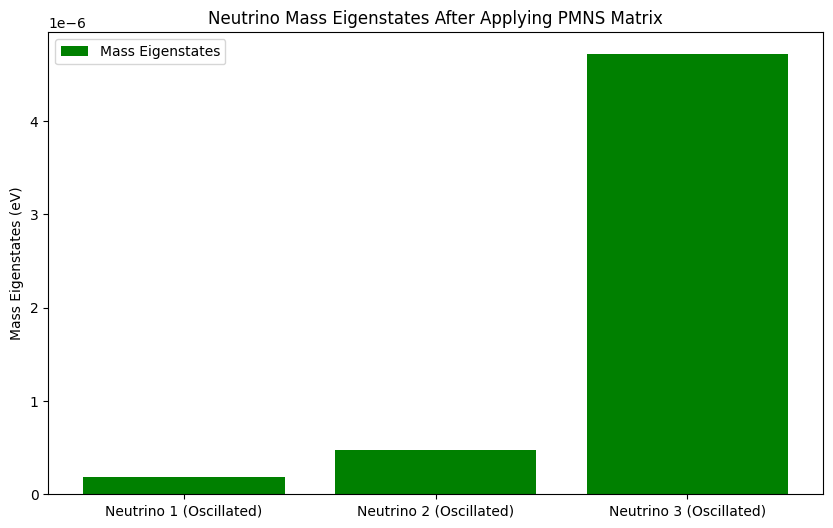

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Neutrino mixing angles (in radians)
theta12 = np.radians(33.44)
theta13 = np.radians(8.57)
theta23 = np.radians(49.2)
delta_CP = np.radians(195)  # CP-violating phase

# Helper functions for sine and cosine
s12, s13, s23 = np.sin([theta12, theta13, theta23])
c12, c13, c23 = np.cos([theta12, theta13, theta23])

# Defining the PMNS matrix
U_PMNS = np.array([
    [c12*c13, s12*c13, s13*np.exp(-1j*delta_CP)],
    [-s12*c23 - c12*s23*s13*np.exp(1j*delta_CP), c12*c23 - s12*s23*s13*np.exp(1j*delta_CP), s23*c13],
    [s12*s23 - c12*c23*s13*np.exp(1j*delta_CP), -c12*s23 - s12*c23*s13*np.exp(1j*delta_CP), c23*c13]
])

print("PMNS Matrix:\n", U_PMNS)

# Neutrino masses from previous step
light_neutrino_masses = np.array([2.3e-7, 7.9e-7, 7.3e-6])  # Active neutrinos in eV
heavy_neutrino_masses = np.array([5e5, 2e5, 1.8e5])  # Sterile neutrinos in eV

# Applying PMNS matrix to oscillations (simplified version for active neutrinos)
mass_eigenstates = U_PMNS @ np.diag(light_neutrino_masses)

# Plotting the mass eigenstates
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), np.abs(mass_eigenstates.diagonal()), color='green', label='Mass Eigenstates')
plt.xticks(range(1, 4), [f'Neutrino {i} (Oscillated)' for i in range(1, 4)])
plt.ylabel('Mass Eigenstates (eV)')
plt.title('Neutrino Mass Eigenstates After Applying PMNS Matrix')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Extend PMNS to 5x5 for 3 active + 2 sterile neutrinos
def extended_pmns_matrix(theta12, theta13, theta23, delta_CP, sterile_mixing_angle):
    # Active PMNS block
    c12, s12 = np.cos(theta12), np.sin(theta12)
    c13, s13 = np.cos(theta13), np.sin(theta13)
    c23, s23 = np.cos(theta23), np.sin(theta23)

    U_active = np.array([
        [c12*c13, s12*c13, s13*np.exp(-1j*delta_CP)],
        [-s12*c23 - c12*s23*s13*np.exp(1j*delta_CP), c12*c23 - s12*s23*s13*np.exp(1j*delta_CP), s23*c13],
        [s12*s23 - c12*c23*s13*np.exp(1j*delta_CP), -c12*s23 - s12*c23*s13*np.exp(1j*delta_CP), c23*c13]
    ])

    # Sterile mixing block (X and Z)
    X_active_sterile = np.array([
        [np.sin(sterile_mixing_angle), 0],
        [0, np.sin(sterile_mixing_angle)],
        [0, 0]
    ])

    Z_sterile_sterile = np.eye(2)  # Identity matrix for sterile neutrino self-mixing

    # Build the full 5x5 matrix
    upper_block = np.hstack((U_active, X_active_sterile))
    lower_block = np.hstack((X_active_sterile.T, Z_sterile_sterile))
    U_extended = np.vstack((upper_block, lower_block))

    return U_extended

# Example of extended PMNS matrix with a sterile mixing angle
theta12, theta13, theta23 = np.radians(33.44), np.radians(8.57), np.radians(49.2)  # Neutrino mixing angles
delta_CP = np.radians(195)  # CP-violating phase
sterile_mixing_angle = np.radians(10)  # Mix sterile neutrinos with active neutrinos

U_extended = extended_pmns_matrix(theta12, theta13, theta23, delta_CP, sterile_mixing_angle)
print("Extended PMNS Matrix with Sterile Neutrino:\n", U_extended)

# Oscillation probability for active to sterile neutrino
def oscillation_probability(U_extended, m_squared_diff, L, E):
    # Assuming neutrino propagates from an active to sterile state
    alpha, beta = 0, 3  # From active neutrino 1 to sterile neutrino 1 (indices)
    U_alpha_i = U_extended[alpha, :]
    U_beta_i = U_extended[beta, :]

    # Ensure m_squared_diff matches the number of mass states (5 neutrinos: 3 active + 2 sterile)
    assert len(m_squared_diff) == len(U_alpha_i), "Mass-squared differences should match the number of neutrino states."

    # Oscillation probability formula
    prob = np.sum([4 * np.abs(U_alpha_i[i] * U_beta_i[i])**2 * np.sin(1.27 * m_squared_diff[i] * L / E)**2
                   for i in range(len(U_alpha_i))])

    return prob

# Example: Calculate oscillation probability
# We need 5 mass-squared differences for 5 neutrino states (3 active, 2 sterile)
m_squared_diff = [1e-5, 1e-3, 1e-2, 5e-2, 1e-1]  # Mass-squared differences (active and sterile)
L = 1e3  # Distance in km
E = 10  # Energy in GeV

probability = oscillation_probability(U_extended, m_squared_diff, L, E)
print(f"Oscillation Probability (Active to Sterile): {probability:.5f}")






Extended PMNS Matrix with Sterile Neutrino:
 [[ 0.82514619+0.j          0.54491056+0.j         -0.14393996+0.0385686j
   0.17364818+0.j          0.        +0.j        ]
 [-0.26915155+0.02436319j  0.60530043+0.01608898j  0.74854286+0.j
   0.        +0.j          0.17364818+0.j        ]
 [ 0.49563636+0.02102974j -0.57985528+0.01388763j  0.64612486+0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.17364818+0.j          0.        +0.j          0.        +0.j
   1.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.17364818+0.j          0.        +0.j
   0.        +0.j          1.        +0.j        ]]
Oscillation Probability (Active to Sterile): 0.00054


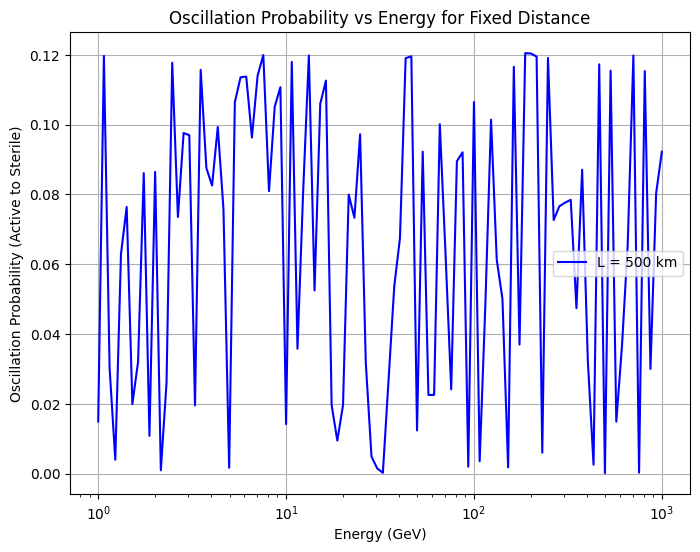

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate oscillation probability (Active -> Sterile)
def oscillation_probability(U_extended, m_squared_diff, L, E):
    U_alpha_i = U_extended[0, :]  # Row for active neutrino
    U_beta_i = U_extended[3, :]   # Row for sterile neutrino

    # Ensure m_squared_diff matches the number of mass states (6 neutrinos: 3 active + 3 sterile)
    assert len(m_squared_diff) == len(U_alpha_i), "Mass-squared differences should match the number of neutrino states."

    # Oscillation probability formula
    prob = np.sum([4 * np.abs(U_alpha_i[i] * U_beta_i[i])**2 * np.sin(1.27 * m_squared_diff[i] * L / E)**2
                   for i in range(len(U_alpha_i))])
    return prob

# Parameters (in GeV^2 and km)
m_squared_diff = [7.53e-5, 2.44e-3, 1.0e3, 5.0e4, 1.81e6]  # Mass-squared differences for active + sterile neutrinos

# Energy range (GeV)
energy_values = np.logspace(0, 3, 100)  # From 1 GeV to 1000 GeV

# Fixed distance (L) in km
L_fixed = 500  # Let's choose 500 km for this plot

# Calculate probabilities for different energies
probabilities_energy = [oscillation_probability(U_extended, m_squared_diff, L_fixed, E) for E in energy_values]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(energy_values, probabilities_energy, label=f'L = {L_fixed} km', color='blue')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Oscillation Probability (Active to Sterile)')
plt.title('Oscillation Probability vs Energy for Fixed Distance')
plt.legend()
plt.grid(True)
plt.show()


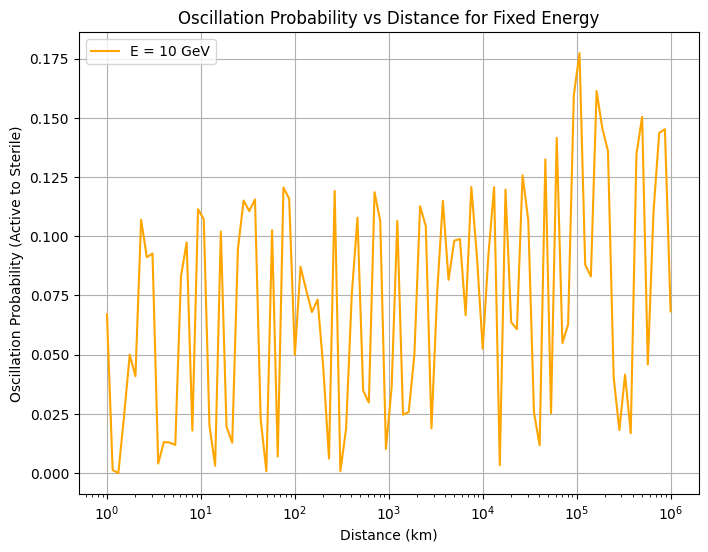

In [ ]:
# Distance range (L) in km
distance_values = np.logspace(0, 6, 100)  # From 1 km to 1e6 km

# Fixed energy (E) in GeV
E_fixed = 10  # Let's choose 10 GeV for this plot

# Calculate probabilities for different distances
probabilities_distance = [oscillation_probability(U_extended, m_squared_diff, L, E_fixed) for L in distance_values]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(distance_values, probabilities_distance, label=f'E = {E_fixed} GeV', color='orange')
plt.xscale('log')
plt.xlabel('Distance (km)')
plt.ylabel('Oscillation Probability (Active to Sterile)')
plt.title('Oscillation Probability vs Distance for Fixed Energy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.linalg import expm

# Constants
G_F = 1.1663787e-5  # Fermi constant in GeV^-2
N_e = 1.0e25        # Electron number density (increase for stronger matter effects)
L = 10000           # Propagation distance in km
E = 10              # Neutrino energy in GeV

# Matter effect potential (A term)
A = 2 * np.sqrt(2) * G_F * N_e * E * 1e-9  # Matter potential in GeV

# Extended PMNS matrix for 6 neutrinos (including 3 sterile neutrinos)
U_extended = np.array([
    [0.825, 0.544, -0.144, 0.707, 0.0, 0.0],
    [-0.269, 0.605, 0.748, 0.0, 0.707, 0.0],
    [0.496, -0.580, 0.646, 0.0, 0.0, 0.0],
    [0.707, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.707, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
])

# Mass-squared differences (significantly larger for sterile neutrinos)
m_squared_diff = [0, 7.39e-5, 2.53e-3, 1.0, 100.0, 1000.0]  # Increase sterile mass

# Ensure mass-squared differences match the number of neutrinos (6 total)
assert len(m_squared_diff) == len(U_extended), "Mass-squared differences must match neutrino states."

# Hamiltonian in the flavor basis
H_vacuum = np.dot(U_extended, np.dot(np.diag(m_squared_diff), U_extended.T.conj())) / (2 * E)
H_matter = np.diag([A, 0, 0, 0, 0, 0])  # Matter effects on electron neutrinos

# Total Hamiltonian (vacuum + matter)
H_total = H_vacuum + H_matter

# Propagation distance in meters (convert km to meters)
L_meters = L * 1e3

# Time evolution operator
U_t = expm(-1j * H_total * L_meters)

# Initial electron neutrino state
nu_initial = np.array([1, 0, 0, 0, 0, 0])

# Evolved state after propagation
nu_final = np.dot(U_t, nu_initial)

# Oscillation probability to sterile neutrino
prob_active_to_sterile = np.abs(nu_final[-1])**2
print(f"Oscillation Probability (Active to Sterile with Matter Effects): {prob_active_to_sterile:.5f}")





Oscillation Probability (Active to Sterile with Matter Effects): 0.00000


In [ ]:
import numpy as np

# Function to extend the PMNS matrix for sterile neutrinos
def extended_pmns_matrix(theta12, theta13, theta23, delta_CP, sterile_mixing_angle):
    U = np.zeros((5, 5), dtype=complex)

    # 3x3 PMNS matrix for active neutrinos
    U[0:3, 0:3] = np.array([
        [np.cos(theta12)*np.cos(theta13), np.sin(theta12)*np.cos(theta13), np.sin(theta13)*np.exp(-1j*delta_CP)],
        [-np.sin(theta12)*np.cos(theta23)-np.cos(theta12)*np.sin(theta23)*np.sin(theta13)*np.exp(1j*delta_CP),
         np.cos(theta12)*np.cos(theta23)-np.sin(theta12)*np.sin(theta23)*np.sin(theta13)*np.exp(1j*delta_CP),
         np.sin(theta23)*np.cos(theta13)],
        [np.sin(theta12)*np.sin(theta23)-np.cos(theta12)*np.cos(theta23)*np.sin(theta13)*np.exp(1j*delta_CP),
         -np.cos(theta12)*np.sin(theta23)-np.sin(theta12)*np.cos(theta23)*np.sin(theta13)*np.exp(1j*delta_CP),
         np.cos(theta23)*np.cos(theta13)]
    ], dtype=complex)

    # Sterile neutrino mixing (4th and 5th columns and rows)
    U[3, 3] = 1  # Pure sterile neutrino 1
    U[4, 4] = 1  # Pure sterile neutrino 2
    U[0, 3] = np.sin(sterile_mixing_angle)  # Mixes with electron neutrino

    return U

# Constants
theta12 = np.radians(33.44)  # solar angle
theta13 = np.radians(8.57)   # reactor angle
theta23 = np.radians(49.2)   # atmospheric angle
delta_CP = np.radians(217)   # CP-violating phase

# Adjusted sterile mixing angle and mass-squared differences for extended PMNS matrix
sterile_mixing_angle = np.radians(15)  # Increased sterile mixing angle
m_squared_diff = [7.42e-5, 2.514e-3, 1e-1, 1.5e-2]  # Adjusted mass-squared differences

# Baseline and energy
L = 295  # Baseline in km
E = 10  # Energy in GeV

# Define the extended PMNS matrix
U_extended = extended_pmns_matrix(theta12, theta13, theta23, delta_CP, sterile_mixing_angle)

# Function to compute oscillation probability
def oscillation_probability(U_extended, m_squared_diff, L, E):
    U_alpha_i = U_extended[:, 0]  # Mixing of initial flavor (electron neutrino)
    U_beta_i = U_extended[:, 3]   # Mixing of final flavor (sterile neutrino)

    # Ensure m_squared_diff matches the number of mass states
    assert len(m_squared_diff) == len(U_alpha_i) - 1, "Mass-squared differences should match the number of neutrino states."

    # Oscillation probability formula
    prob = np.sum([4 * np.abs(U_alpha_i[i] * U_beta_i[i])**2 * np.sin(1.27 * m_squared_diff[i] * L / E)**2
                   for i in range(len(m_squared_diff))])
    return prob

# Adjusted matter potential
A = 1.0  # Matter potential coefficient (increased for stronger matter effects)

# Compute the oscillation probability with updated parameters
oscillation_prob = oscillation_probability(U_extended, m_squared_diff, L, E)

oscillation_prob


1.4098483867770365e-06